In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyarrow
import pyarrow.parquet as pq
import sys
from pathlib import Path

In [2]:
#Import the updated DataLoader class
sys.path.append(str(Path("../src").resolve()))
from data.data_loader import DataLoader

In [3]:
#Load and copy Dataframe
data_path= "D:/2_Anyone_ML/Final_proyect/nyc-taxi-predictor/data/raw/yellow_tripdata_2022-05.parquet"
loader = DataLoader(data_path)
df = loader.load_data()


EDA


In [4]:
#Dataframe copy
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [5]:
print(df.shape)


(3588295, 19)


In [6]:
print(df.info)

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-05-01 00:00:36   2022-05-01 00:19:18              1.0   
1               1  2022-05-01 00:27:44   2022-05-01 00:41:33              1.0   
2               1  2022-05-01 00:59:00   2022-05-01 01:14:22              1.0   
3               1  2022-05-01 00:48:18   2022-05-01 01:28:02              1.0   
4               1  2022-05-01 00:28:26   2022-05-01 00:37:49              1.0   
...           ...                  ...                   ...              ...   
3588290         2  2022-05-31 23:40:19   2022-06-01 00:01:20              NaN   
3588291         2  2022-05-31 23:52:12   2022-06-01 00:06:40              NaN   
3588292         2  2022-05-31 23:27:00   2022-05-31 23:48:00              NaN   
3588293         2  2022-05-31 23:34:12   2022-06-01 00:00:13              NaN   
3588294         2  2022-05-31 23:00:53   2022-05-31 23:07:54              NaN

In [7]:
#Summarize stats
def summarize_data(df):
    "Generate summarize statistics and identify missin values, ducplicates, and outliers"
    summary_stats = df.describe(include="all").transpose()
    missing_values_report = df.isnull().sum().to_frame(name="missing_count")
    missing_values_report['missing_percentage']= (
        missing_values_report["missing_count"]/len(df)*100
    )
    duplicate_count= df.duplicated().sum()
    return summary_stats, missing_values_report, duplicate_count 


summary_stats, missing_values_report, duplicate_count = summarize_data(df)

In [8]:

display(summary_stats)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
VendorID,3588295.0,NaN,NaN,NaN,1.713103,1.0,1.0,2.0,2.0,6.0,0.488809
tpep_pickup_datetime,3588295,NaN,NaN,NaN,2022-05-16 07:50:29.219312,2003-01-01 00:06:06,2022-05-08 18:14:16.500000,2022-05-16 09:14:42,2022-05-23 18:03:17,2022-06-01 23:55:30,NaN
tpep_dropoff_datetime,3588295,NaN,NaN,NaN,2022-05-16 08:08:42.275203,2003-01-01 00:31:38,2022-05-08 18:32:36,2022-05-16 09:33:15,2022-05-23 18:21:03.500000,2022-06-02 00:03:51,NaN
passenger_count,3458771.0,NaN,NaN,NaN,1.393923,0.0,1.0,1.0,1.0,9.0,0.955549
trip_distance,3588295.0,NaN,NaN,NaN,6.856861,0.0,1.15,1.96,3.73,357192.65,690.848782
RatecodeID,3458771.0,NaN,NaN,NaN,1.365674,1.0,1.0,1.0,1.0,99.0,5.239789
store_and_fwd_flag,3458771,2,N,3404113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULocationID,3588295.0,NaN,NaN,NaN,164.573797,1.0,132.0,162.0,234.0,265.0,65.628132
DOLocationID,3588295.0,NaN,NaN,NaN,162.551711,1.0,113.0,162.0,234.0,265.0,70.279259
payment_type,3588295.0,NaN,NaN,NaN,1.183209,0.0,1.0,1.0,1.0,4.0,0.507599


In [9]:
display(missing_values_report)

,missing_count,missing_percentage
VendorID,0,0.000000
tpep_pickup_datetime,0,0.000000
tpep_dropoff_datetime,0,0.000000
passenger_count,129524,3.609625
trip_distance,0,0.000000
RatecodeID,129524,3.609625
store_and_fwd_flag,129524,3.609625
PULocationID,0,0.000000
DOLocationID,0,0.000000
payment_type,0,0.000000


In [10]:
print(f"\nNumber of Duplicates: {duplicate_count}")


Number of Duplicates: 0


In [11]:
columns = df.columns
columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

##VendorID: Código que indica el proveedor del servicio de taxi: (Categórica)


1: Creative Mobile Technologies, LLC.
2: VeriFone Inc.


##tpep_pickup_datetime: Fecha y hora en que el viaje comenzó. (Datetime)


##tpep_dropoff_datetime: Fecha y hora en que el viaje terminó. (Datetime)


##passenger_count: Cantidad de pasajeros reportados por el conductor. (Numérica discreta)


##trip_distance: Distancia recorrida durante el viaje (en millas). (Numérica continua)


##RatecodeID: Código de tarifa asignado al final del viaje:(Categórica)


1: Tarifa estándar. 
2: JFK.
3: Newark.
4: Nassau o Westchester.
5: Tarifa negociada.
6: Viaje grupal.


##store_and_fwd_flag: Indica si el registro se almacenó en la memoria del vehículo antes de enviarlo al servidor: (Categórica binaria)


Y: Se almacenó.
N: No se almacenó.


##PULocationID: ID de la ubicación donde el pasajero fue recogido. (Numérica discreta)


##DOLocationID: ID de la ubicación donde el pasajero fue dejado. (Numérica discreta)


##payment_type: Código del tipo de pago:(Categórica)


1: Tarjeta de crédito.
2: Efectivo.
3: Sin cargo.
4: Disputa.
5: Desconocido.
6: Viaje anulado.


##fare_amount: Tarifa base del viaje calculada por el taxímetro. (Numérica continua)


##extra: Cargos adicionales (como recargos por hora pico o nocturnos). (Numérica continua)


##mta_tax: Impuesto MTA de $0.50 (fijo por viaje). (Numérica continua)


##improvement_surcharge: Recargo de $0.30 aplicado desde 2015 (fijo por viaje). (Numérica continua)


##tip_amount: Cantidad de propina. (Numérica continua)


##tolls_amount: Total pagado en peajes durante el viaje. (Numérica continua)


##total_amount: Monto total cobrado al pasajero. (Numérica continua)


##congestion_surcharge: Recargo por congestión (aplicable en áreas específicas). (Numérica continua)


##airport_fee: Tarifa asociada a viajes desde o hacia aeropuertos. (Numérica continua)

In [12]:
#correlation matrix
numeric_cols = df[['passenger_count', 'trip_distance', 'congestion_surcharge', 
                   'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 
                   'total_amount']]

categorical_cols = df[["RatecodeID","store_and_fwd_flag", "payment_type", "PULocationID", "DOLocationID"]]

In [13]:
numeric_cols.corr()

,passenger_count,trip_distance,congestion_surcharge,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount
passenger_count,1.000000,0.007400,0.008592,0.029824,-0.091744,-0.002602,0.005457,0.011775,0.022621,0.029942
trip_distance,0.007400,1.000000,-0.060471,0.008633,-0.003724,-0.000215,0.000480,0.007162,0.006366,0.008873
congestion_surcharge,0.008592,-0.060471,1.000000,-0.211503,0.163103,0.505875,0.447533,-0.073466,-0.123087,-0.158280
fare_amount,0.029824,0.008633,-0.211503,1.000000,-0.010174,-0.064968,0.147425,0.562097,0.574991,0.978584
extra,-0.091744,-0.003724,0.163103,-0.010174,1.000000,0.106246,0.085981,0.007825,0.008615,0.013880
mta_tax,-0.002602,-0.000215,0.505875,-0.064968,0.106246,1.000000,0.825877,-0.059072,-0.134003,-0.048147
improvement_surcharge,0.005457,0.000480,0.447533,0.147425,0.085981,0.825877,1.000000,0.062107,0.032875,0.162255
tip_amount,0.011775,0.007162,-0.073466,0.562097,0.007825,-0.059072,0.062107,1.000000,0.448200,0.693463
tolls_amount,0.022621,0.006366,-0.123087,0.574991,0.008615,-0.134003,0.032875,0.448200,1.000000,0.666645
total_amount,0.029942,0.008873,-0.158280,0.978584,0.013880,-0.048147,0.162255,0.693463,0.666645,1.000000


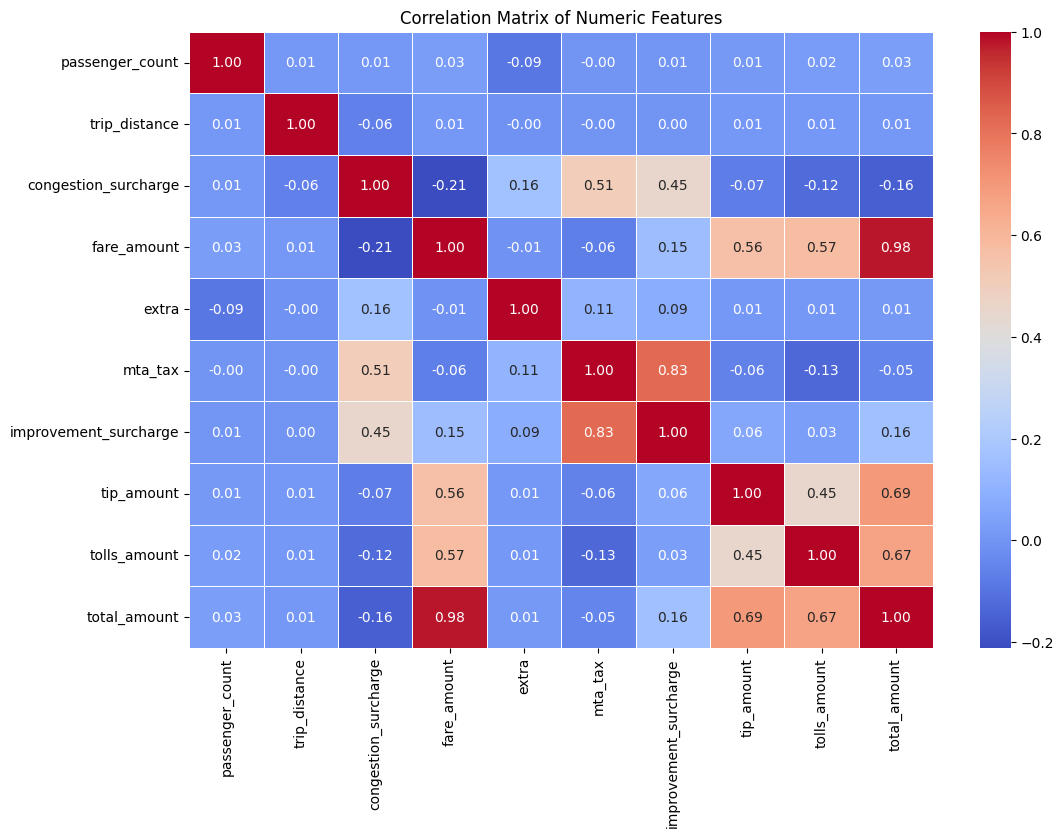

In [14]:
# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

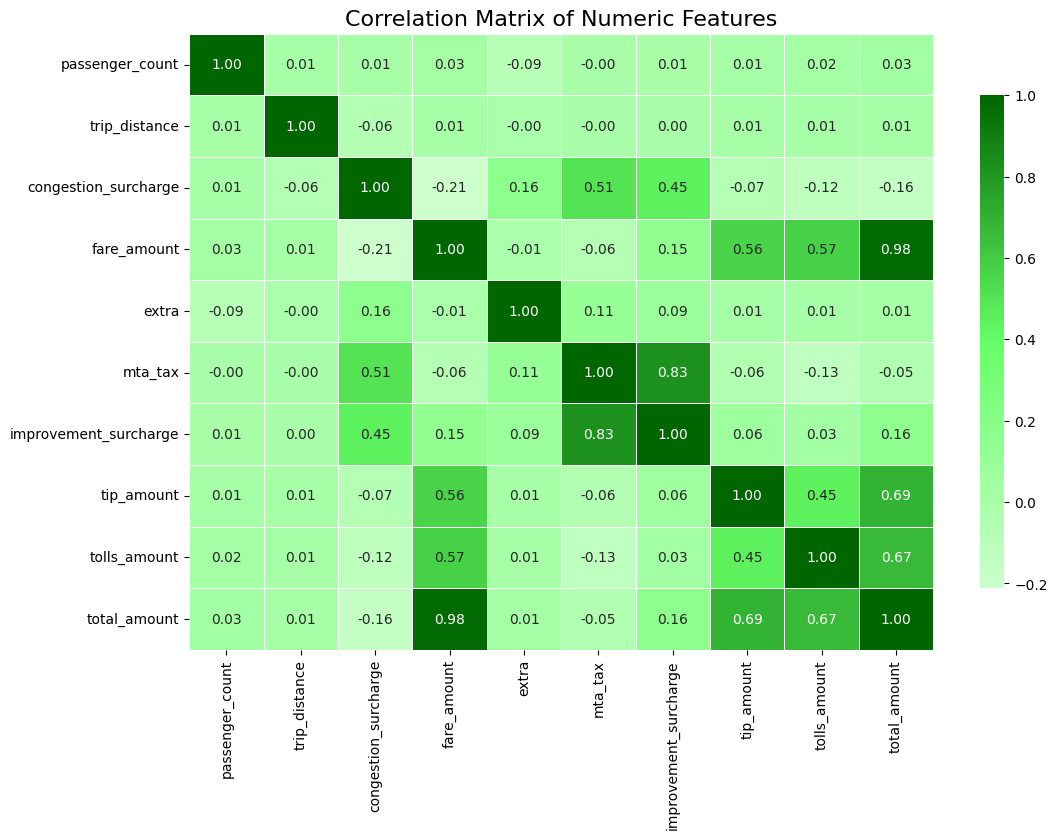

In [15]:
from matplotlib.colors import LinearSegmentedColormap

# Crear un mapa de colores personalizado que vaya de verde claro a verde oscuro
green_cmap = LinearSegmentedColormap.from_list("custom_green", ["#ccffcc", "#66ff66", "#006600"])

# Visualizar la matriz de correlación con el gradiente de verde
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap=green_cmap,  # Usar el mapa de colores personalizado
            fmt='.2f', 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})  # Ajustar la barra de color si es necesario
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()





General Conclusions from CorrelationMatrix:

1_The total amount (total_amount) is highly influenced by the base fare (fare_amount), tips (tip_amount), and tolls (tolls_amount). It may be necessary to use only one of these variables to avoid redundancy.

2_Variables such as trip_distance and passenger_count show weak correlations with costs, which might require a deeper analysis to understand their relevance.

3_Automatic surcharges (improvement_surcharge, mta_tax, congestion_surcharge) have logical and predictable relationships with other variables, but their overall impact on costs is limited.

4_Negative correlations, such as with congestion_surcharge, might indicate specific patterns in short urban trips in congested areas.


In [16]:
#Exploring Diversity
categorical_cols

,RatecodeID,store_and_fwd_flag,payment_type,PULocationID,DOLocationID
0,1.0,N,2,246,151
1,1.0,N,2,238,74
2,1.0,N,2,163,260
3,1.0,N,1,79,182
4,1.0,N,1,238,75
...,...,...,...,...,...
3588290,NaN,None,0,36,181
3588291,NaN,None,0,144,256
3588292,NaN,None,0,161,145
3588293,NaN,None,0,145,17


Categorical Variables

In [17]:
print("RatecodeID Clases", categorical_cols["RatecodeID"].nunique())
print("store_and_fwd_flag Classes",categorical_cols["store_and_fwd_flag"].nunique())
print("payment_type Classes", categorical_cols["payment_type"].nunique())
print("PULocationID Classes", categorical_cols["PULocationID"].nunique())
print("DOLocationID Classes", categorical_cols["DOLocationID"].nunique())

RatecodeID Clases 7
store_and_fwd_flag Classes 2
payment_type Classes 5
PULocationID Classes 259
DOLocationID Classes 261


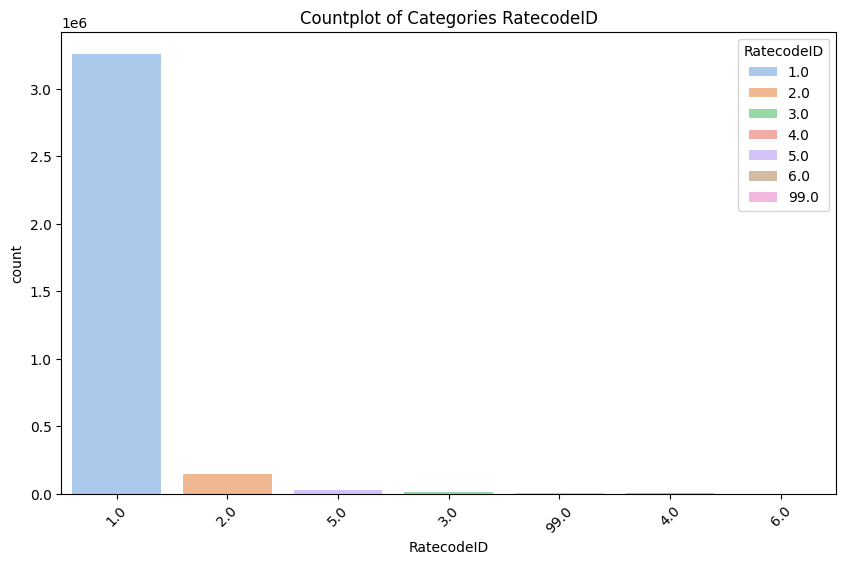

In [18]:
#Count Plot by category

plt.figure(figsize=(10, 6))
sns.countplot(data= categorical_cols,
              x="RatecodeID",
              order= categorical_cols["RatecodeID"].value_counts().index,
              palette='pastel',
              hue= "RatecodeID"
              )
plt.xticks(rotation = 45)
plt.title("Countplot of Categories RatecodeID")
plt.show()


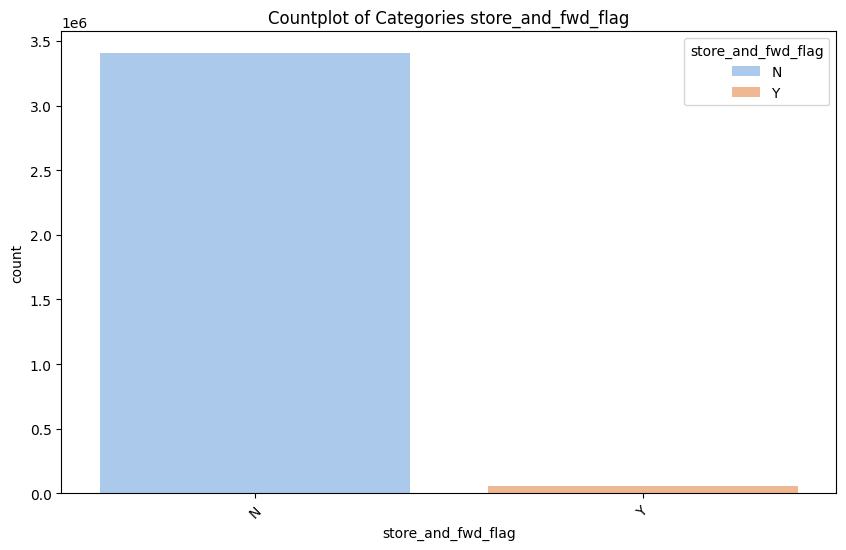

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data= categorical_cols,
            x= "store_and_fwd_flag",
            order= categorical_cols["store_and_fwd_flag"].value_counts().index,
            palette='pastel',
            hue= "store_and_fwd_flag"

            )
plt.xticks(rotation = 45)
plt.title("Countplot of Categories store_and_fwd_flag")
plt.show()

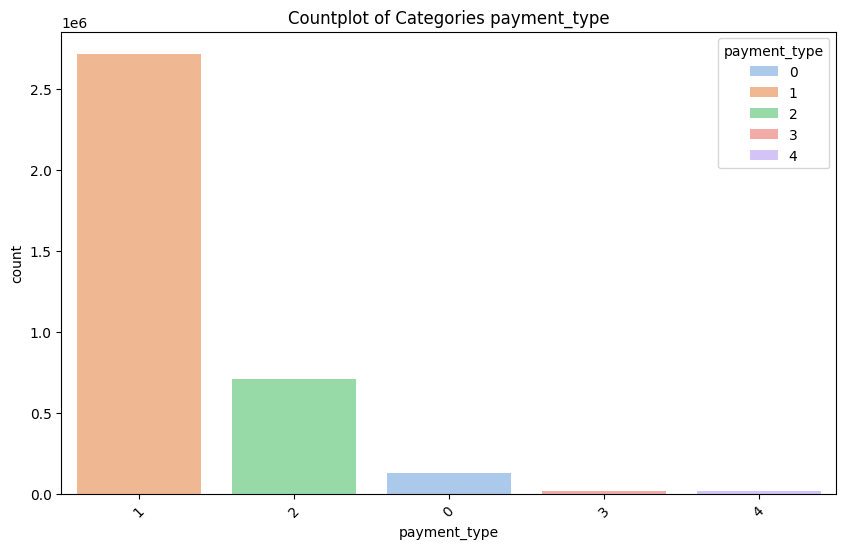

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data= categorical_cols,
              x="payment_type",
              order= categorical_cols["payment_type"].value_counts().index,
              palette='pastel',
              hue="payment_type"
              )
plt.xticks(rotation = 45)
plt.title("Countplot of Categories payment_type")
plt.show()

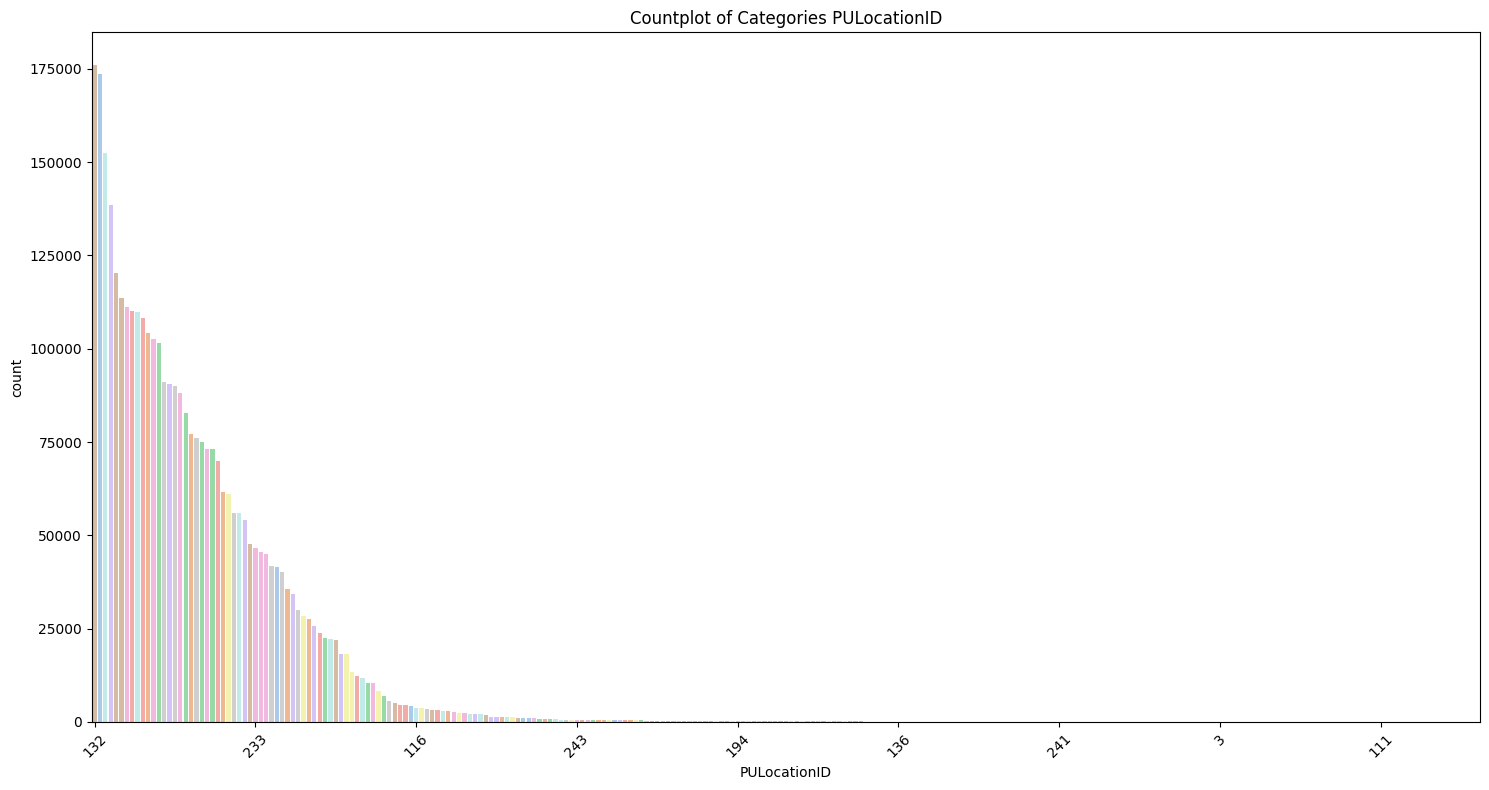

In [21]:

from matplotlib.ticker import MaxNLocator 
plt.figure(figsize=(15, 8))  # Aumentamos el tamaño de la figura para dar más espacio
sns.countplot(data=categorical_cols,
              x="PULocationID",
              order=categorical_cols["PULocationID"].value_counts().index,
              palette='pastel',
              hue="PULocationID",
              legend=False
              )


plt.xticks(rotation=45)  
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  

plt.title("Countplot of Categories PULocationID")
plt.tight_layout()  
plt.show()

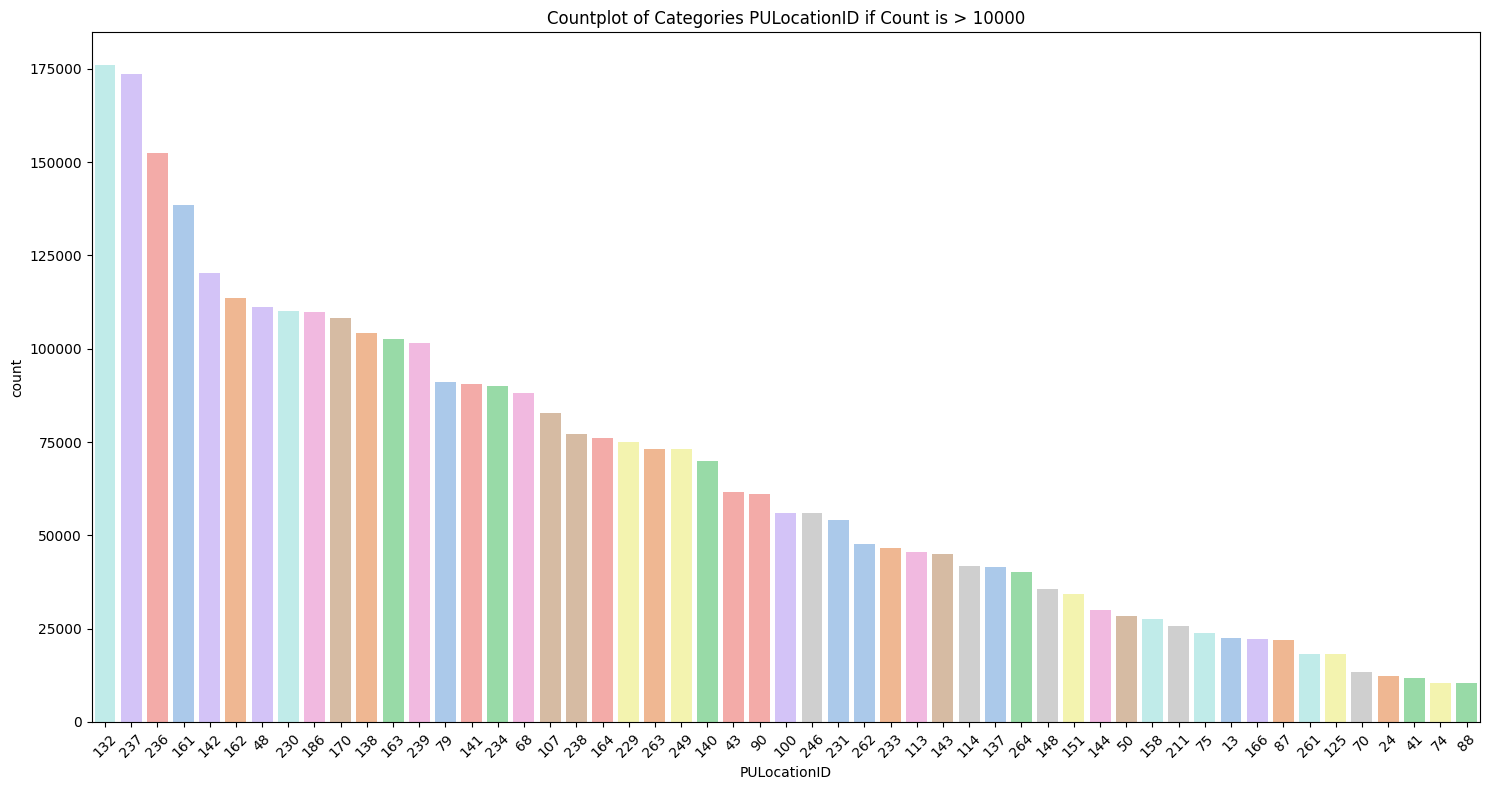

In [22]:
# Calculate the count of occurrences for each category in PULocationID
category_counts = categorical_cols['PULocationID'].value_counts()

# Filter categories with more than 20,000 counts
filter_PUlocationID = categorical_cols[categorical_cols['PULocationID'].isin(category_counts[category_counts > 10000].index)]

# Now create the plot if there are filtered categories
plt.figure(figsize=(15, 8))  
sns.countplot(data=filter_PUlocationID,
              x="PULocationID",
              order=filter_PUlocationID["PULocationID"].value_counts().index,
              palette='pastel', 
              hue="PULocationID",  
              legend=False)

plt.xticks(rotation=45)  
plt.title("Countplot of Categories PULocationID if Count is > 10000")
plt.tight_layout()  
plt.show()


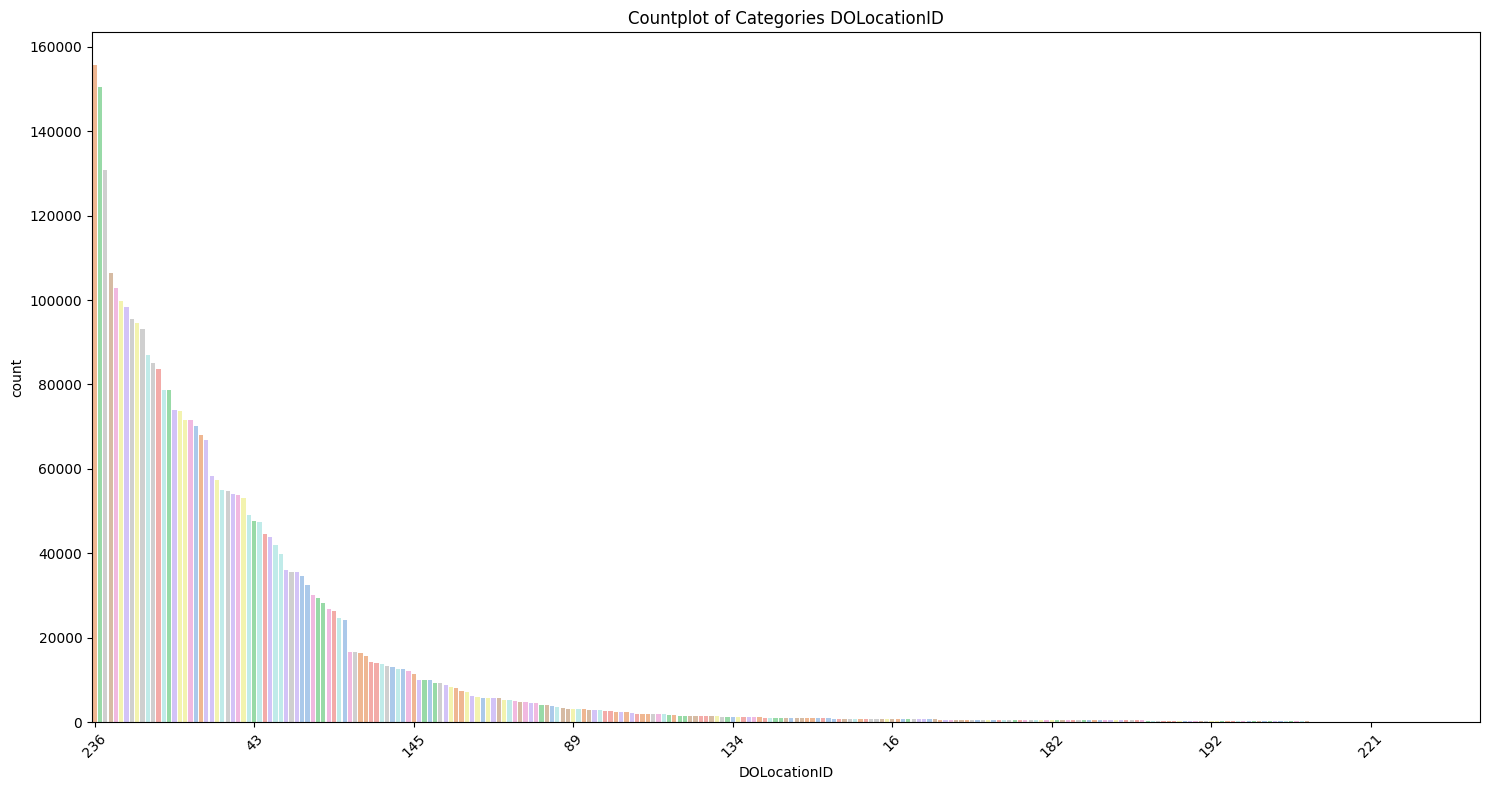

In [23]:
plt.figure(figsize=(15, 8))  
sns.countplot(data=categorical_cols,
              x="DOLocationID",
              order=categorical_cols["DOLocationID"].value_counts().index,
              palette='pastel',
              hue="DOLocationID",
              legend=False
              )


plt.xticks(rotation=45)  
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  

plt.title("Countplot of Categories DOLocationID")
plt.tight_layout()  
plt.show()

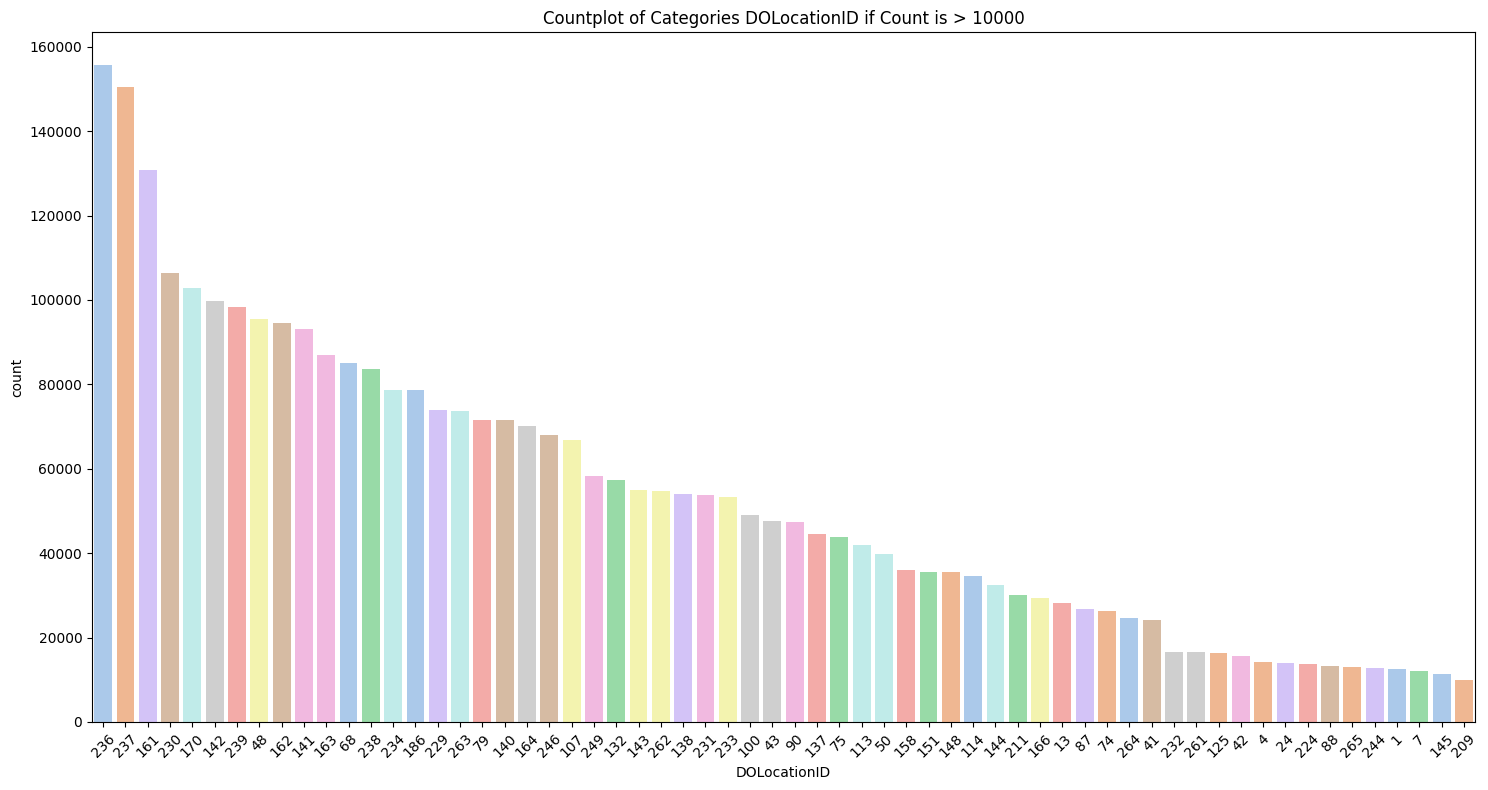

In [24]:
# Calculate the count of occurrences for each category in DOLocationID
category_counts = categorical_cols['DOLocationID'].value_counts()

# Filter categories with more than 20,000 counts
filter_PUlocationID = categorical_cols[categorical_cols['DOLocationID'].isin(category_counts[category_counts > 10000].index)]

# Now create the plot if there are filtered categories
plt.figure(figsize=(15, 8))  
sns.countplot(data=filter_PUlocationID,
              x="DOLocationID",
              order=filter_PUlocationID["DOLocationID"].value_counts().index,
              palette='pastel', 
              hue="DOLocationID",  
              legend=False)

plt.xticks(rotation=45)  
plt.title("Countplot of Categories DOLocationID if Count is > 10000")
plt.tight_layout()  
plt.show()

Numerical Variables

In [25]:
numeric_cols.columns

Index(['passenger_count', 'trip_distance', 'congestion_surcharge',
       'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge',
       'tip_amount', 'tolls_amount', 'total_amount'],
      dtype='object')

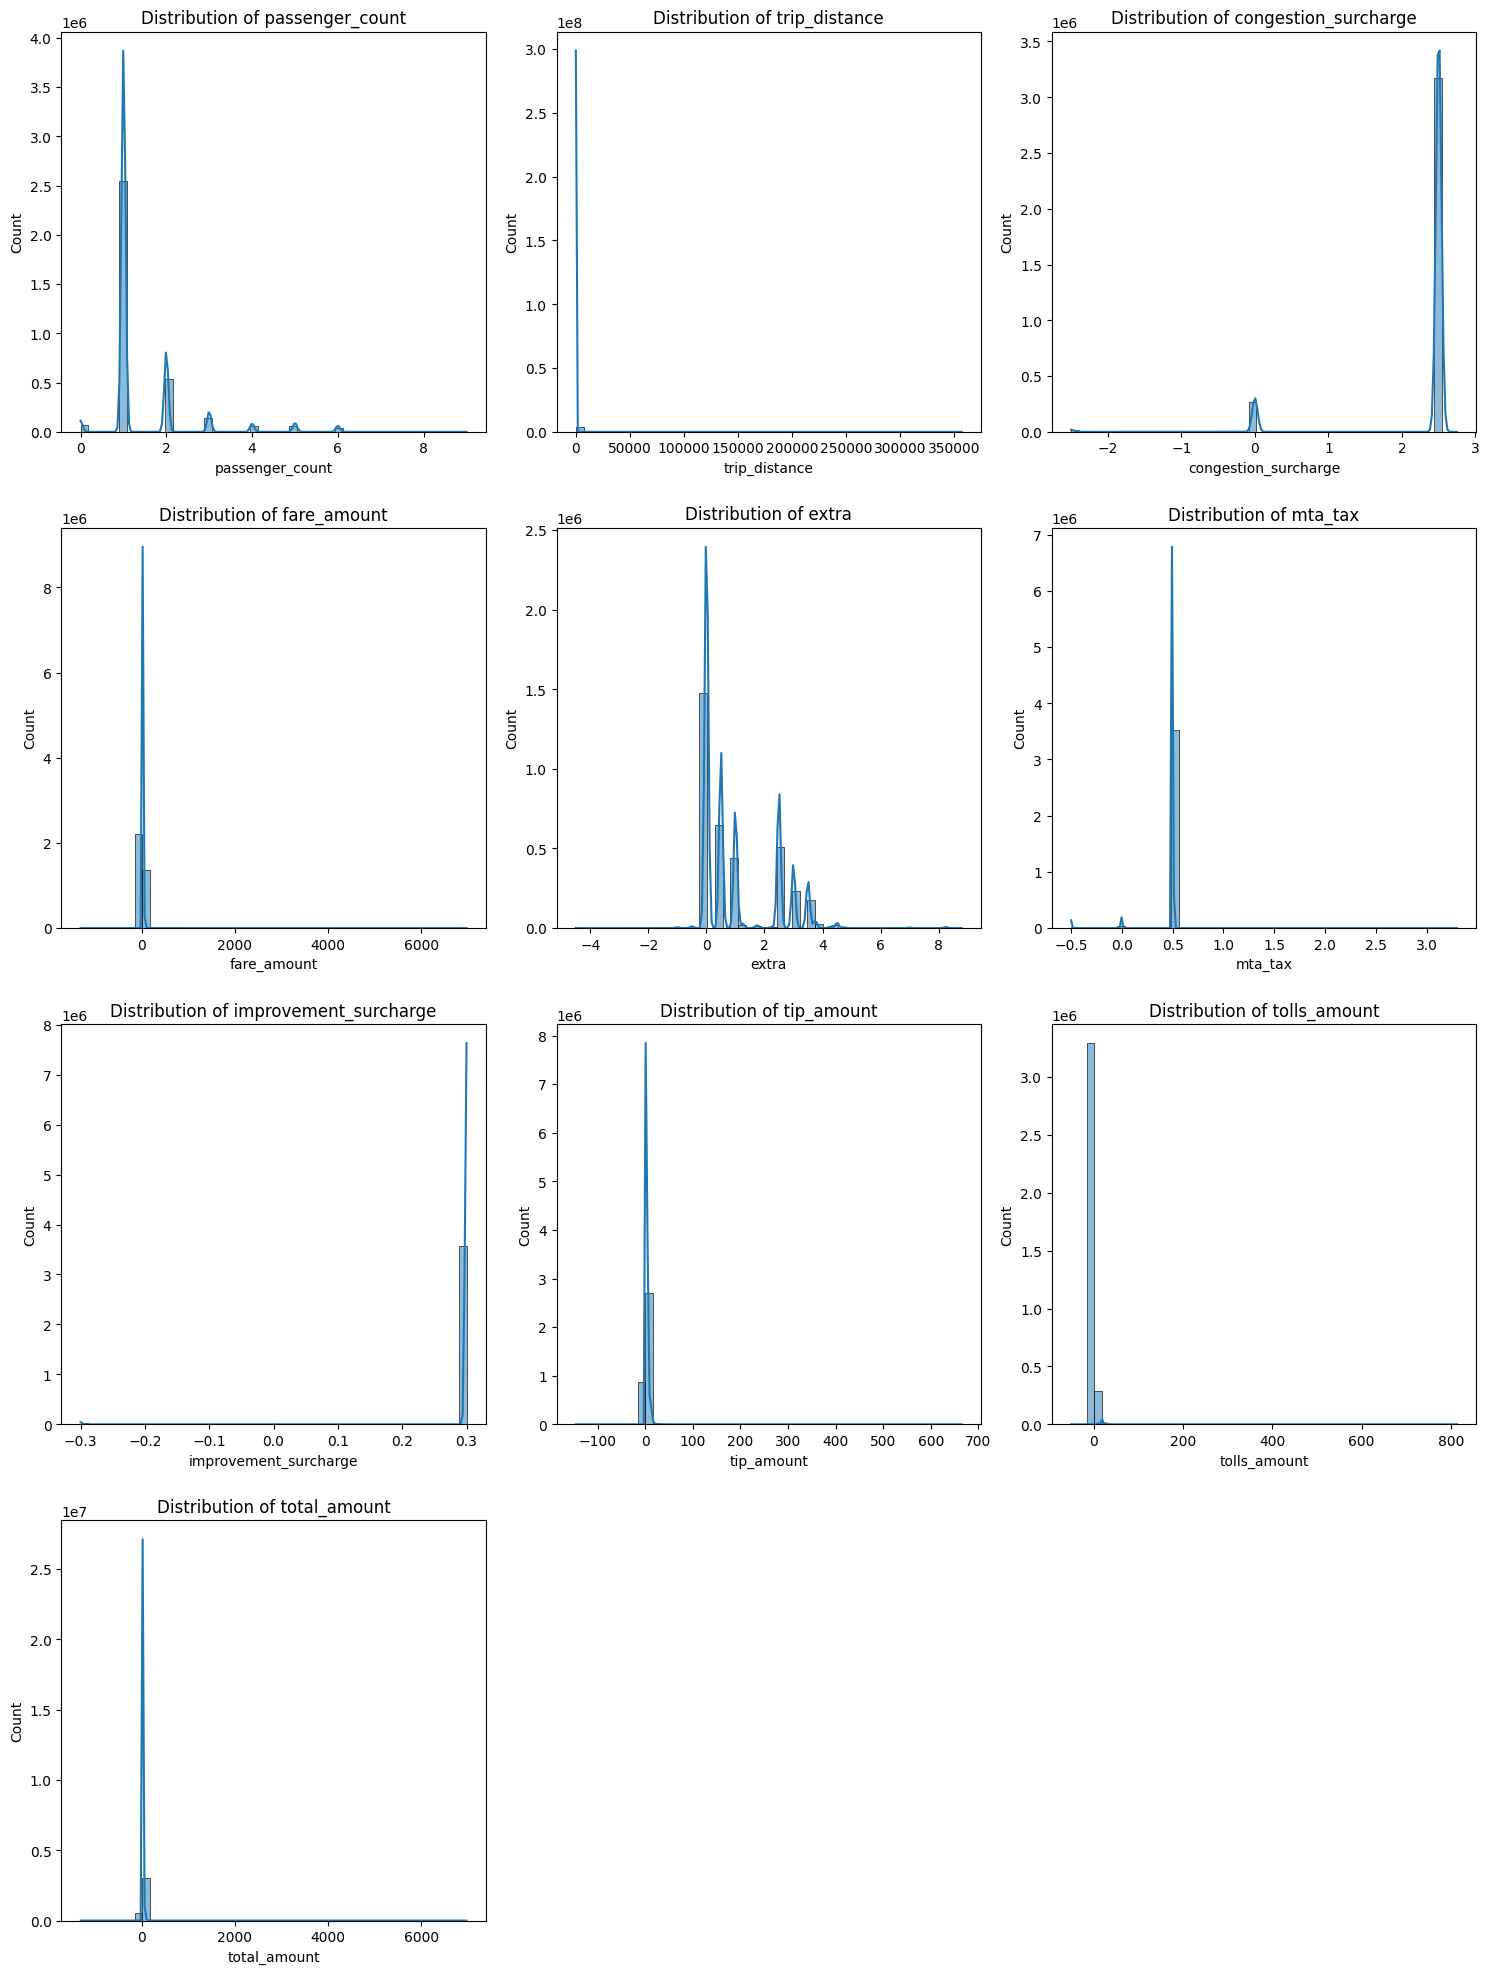

In [26]:
import math

# Determine the number of numeric columns
num_cols = len(numeric_cols.columns)

# Calculate the grid size dynamically (2 columns per row)
rows = math.ceil(num_cols / 3)  # Number of rows needed for 3 columns per row

plt.figure(figsize=(15, rows * 5))  # Adjust figure height based on rows
for i, col in enumerate(numeric_cols.columns, 1):  # Enumerate starting from 1
    plt.subplot(rows, 3, i)  # Dynamically adjust the grid
    sns.histplot(numeric_cols[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


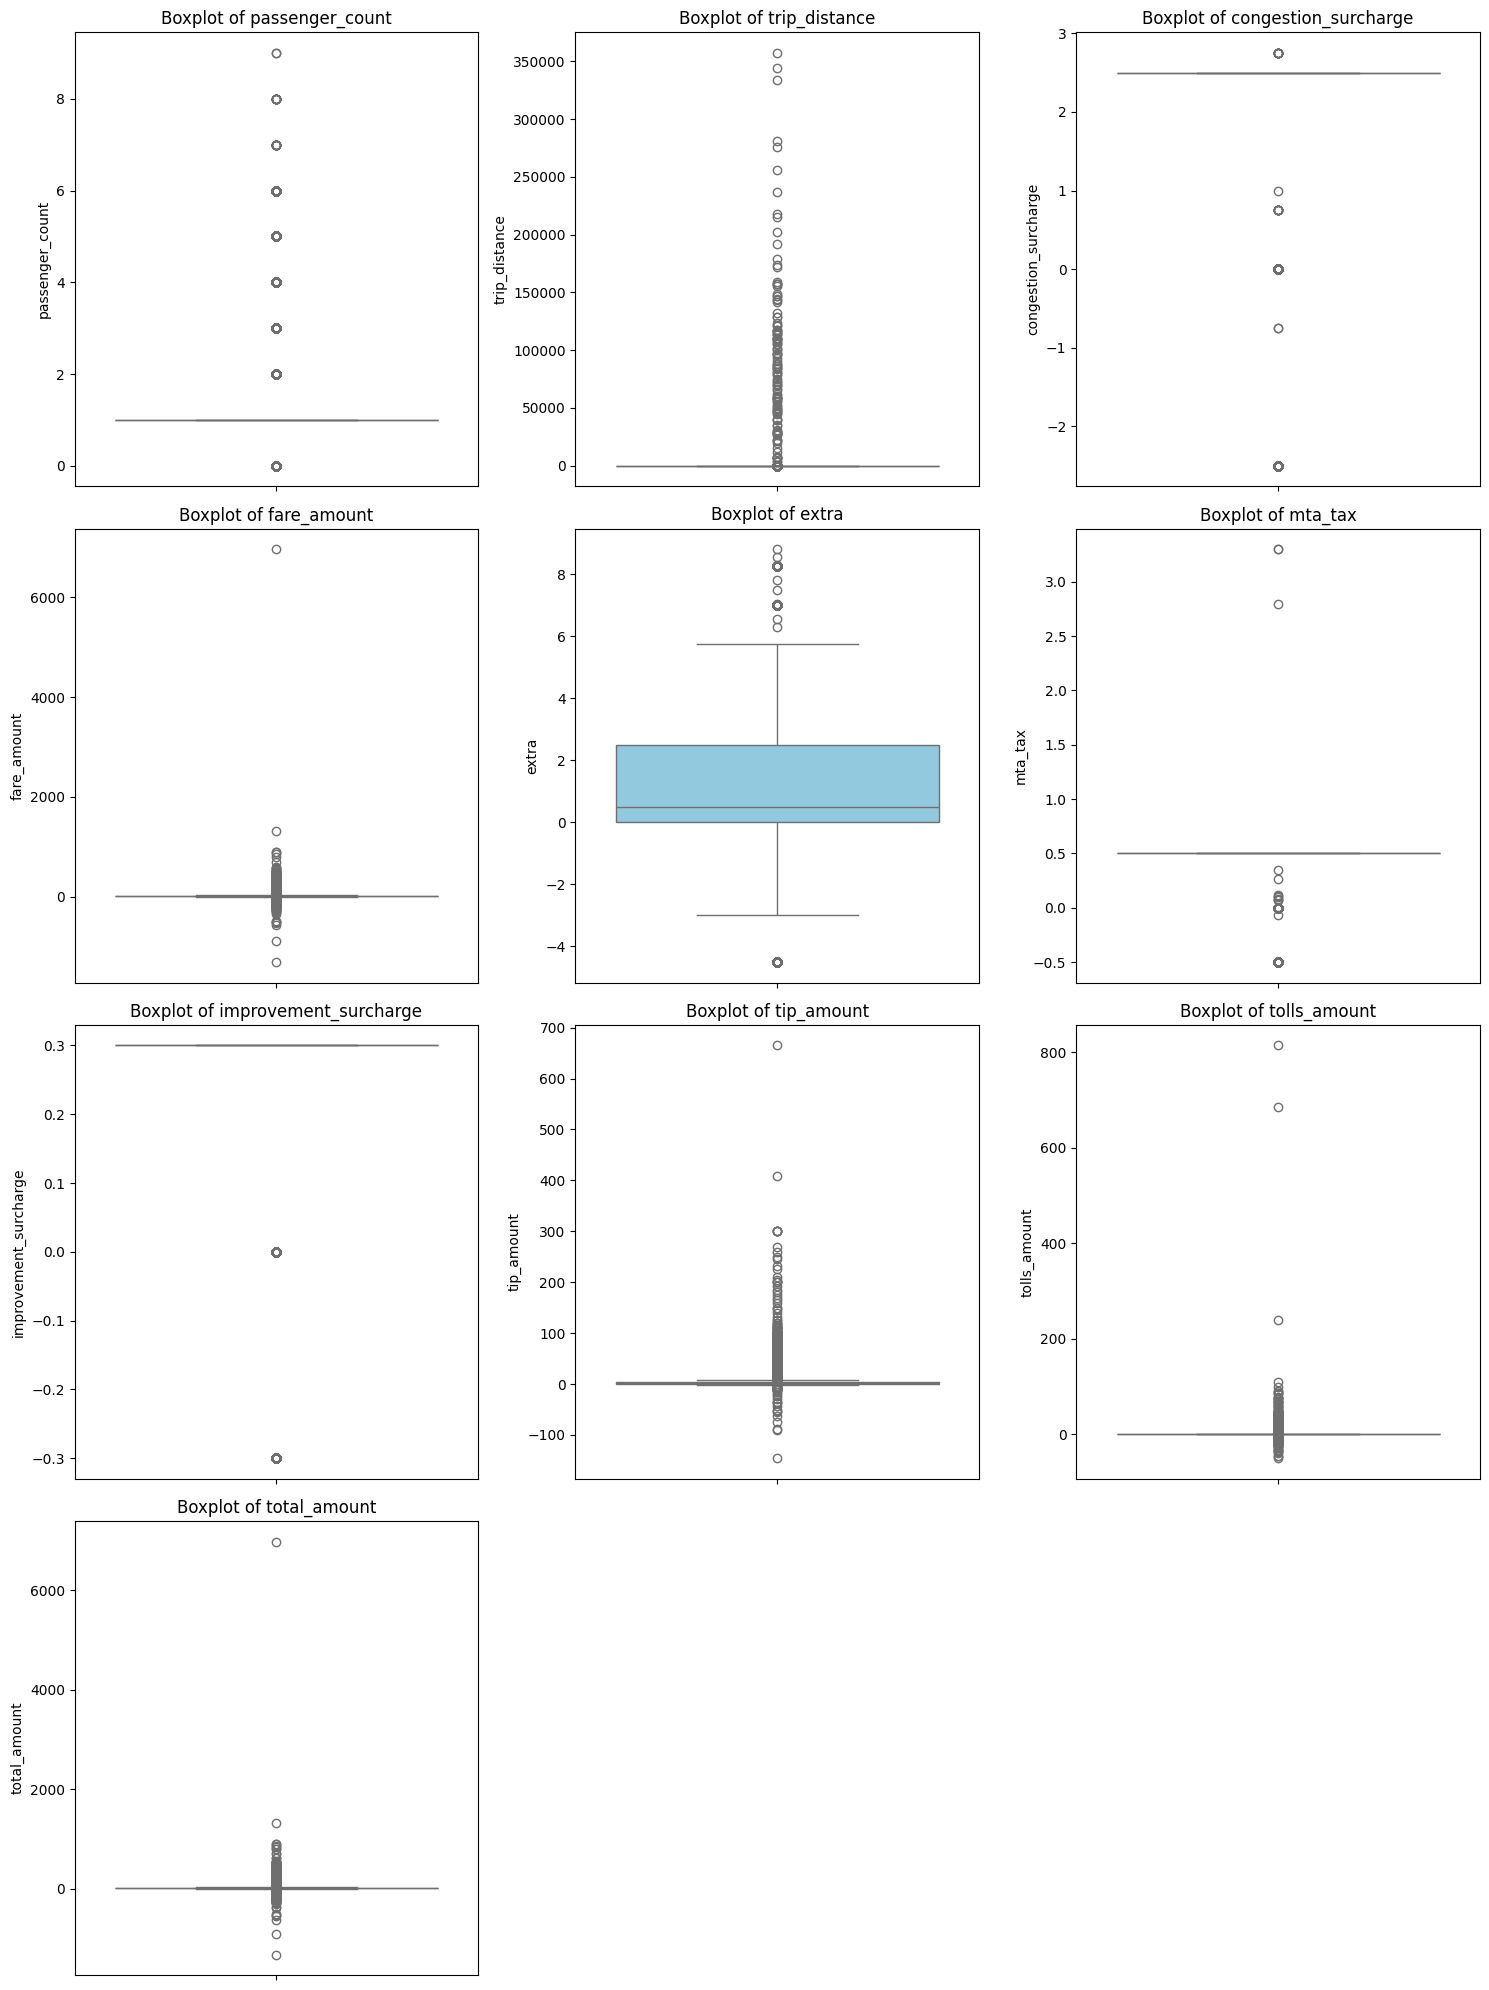

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico para múltiples subplots
num_cols = len(numeric_cols.columns)
rows = math.ceil(num_cols / 3)  # Calcular el número de filas para 3 columnas por fila

plt.figure(figsize=(15, rows * 5))  # Ajustar el tamaño según el número de filas
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(rows, 3, i)  # Crear subplots dinámicamente
    sns.boxplot(data=numeric_cols, y=col, color='skyblue')  # Boxplot para cada columna
    plt.title(f'Boxplot of {col}')  # Título dinámico para cada boxplot
    plt.xlabel('')  # Sin etiqueta en el eje x
    plt.ylabel(col)  # Etiqueta para el eje y
plt.tight_layout()  # Ajustar diseño para evitar superposición
plt.show()


In [28]:
numeric_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,3458771.0,1.393923,0.955549,0.00,1.00,1.00,1.00,9.00
trip_distance,3588295.0,6.856861,690.848782,0.00,1.15,1.96,3.73,357192.65
congestion_surcharge,3458771.0,2.282808,0.745242,-2.50,2.50,2.50,2.50,2.75
fare_amount,3588295.0,15.168132,14.894840,-1311.50,7.00,10.50,17.00,6966.50
extra,3588295.0,1.020728,1.256724,-4.50,0.00,0.50,2.50,8.80
mta_tax,3588295.0,0.489110,0.090089,-0.50,0.50,0.50,0.50,3.30
improvement_surcharge,3588295.0,0.296430,0.045769,-0.30,0.30,0.30,0.30,0.30
tip_amount,3588295.0,2.824744,3.368739,-145.70,1.00,2.16,3.46,665.00
tolls_amount,3588295.0,0.582776,2.173699,-50.75,0.00,0.00,0.00,813.75
total_amount,3588295.0,22.078401,18.486835,-1314.80,12.35,16.30,23.76,6970.80


In [29]:
cont_num_cols = numeric_cols[['trip_distance',
                              'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 
                             'total_amount']]

dis_num_cols = numeric_cols[['passenger_count']]

In [31]:
#percetil 95
for column in cont_num_cols.columns:  
    q95 = cont_num_cols[column].quantile(0.95)  # Calcula el cuantil 95
    print(f"Variable {column}, q95: {q95}")



Variable trip_distance, q95: 16.0
Variable fare_amount, q95: 52.0
Variable extra, q95: 3.5


Variable mta_tax, q95: 0.5
Variable improvement_surcharge, q95: 0.3
Variable tip_amount, q95: 9.69
Variable tolls_amount, q95: 6.55
Variable total_amount, q95: 63.41


In [32]:
for column in dis_num_cols.columns:  
    q95 = dis_num_cols[column].quantile(0.95)  # Calcula el cuantil 95
    print(f"Variable {column}, q95: {q95}")

Variable passenger_count, q95: 3.0
